# Importing Necessary Libraries

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    train_test_split, RandomizedSearchCV, GridSearchCV,
    cross_val_score
)
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, accuracy_score,
    precision_score, recall_score, f1_score, RocCurveDisplay,
    classification_report
)

# Data Analysis, Visualization and Preprocessing

In [130]:
df = pd.read_csv('heart.csv')

In [131]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [132]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [133]:
df.shape

(1025, 14)

In [134]:
df['target'].value_counts()

,count
target,
1,526
0,499


In [135]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [136]:
df.duplicated().sum()

np.int64(723)

In [137]:
df.drop_duplicates(inplace=True)

In [138]:
df.shape

(302, 14)

In [139]:
df['target'].value_counts()

,count
target,
1,164
0,138


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [141]:
# summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [142]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [143]:
df['sex'].value_counts()

,count
sex,
1,206
0,96


<Axes: xlabel='sex,target'>

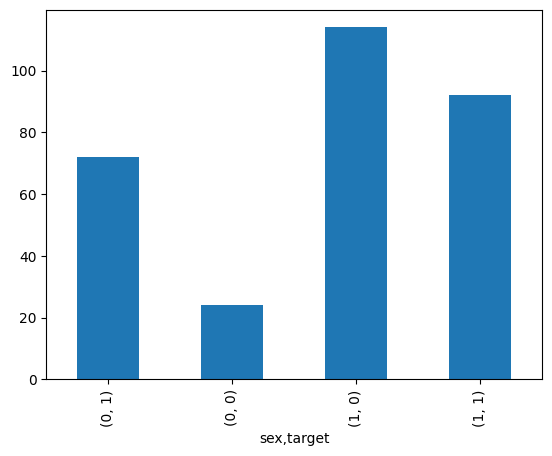

In [144]:
# group sex column by target column
df.groupby('sex')['target'].value_counts().plot(kind='bar')

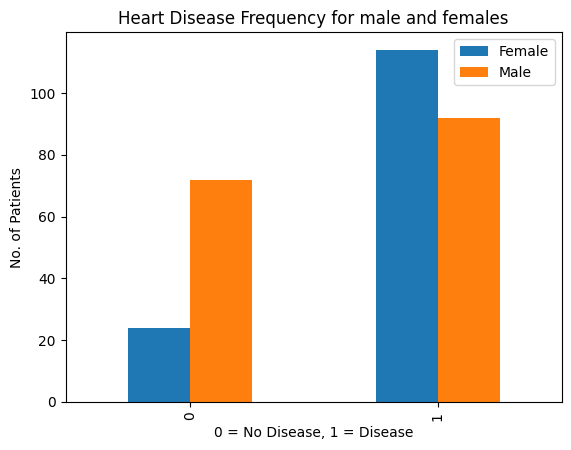

In [145]:
pd.crosstab(df['sex'], df['target']).plot(kind='bar')
plt.title('Heart Disease Frequency for male and females')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('No. of Patients')
plt.legend(['Female', 'Male'])
plt.show()

In [146]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [147]:
df['age']

,age
0,52
1,53
2,70
3,61
4,62
...,...
723,68
733,44
739,52
843,59


In [148]:
df['thalach']

,thalach
0,168
1,155
2,125
3,161
4,106
...,...
723,115
733,175
739,161
843,125


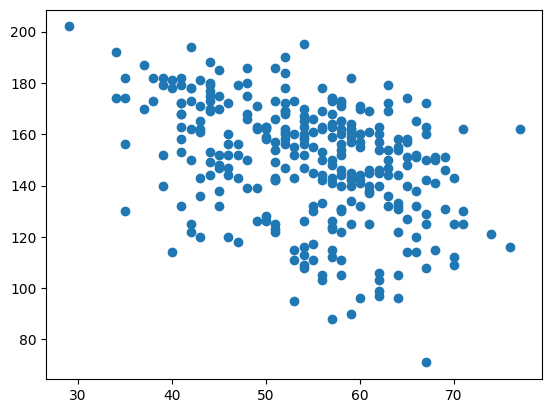

In [149]:
plt.plot(df['age'], df['thalach'], 'o')

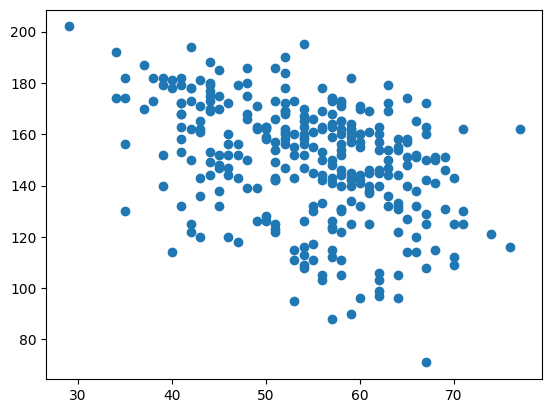

In [150]:
plt.scatter(df['age'], df['thalach'])

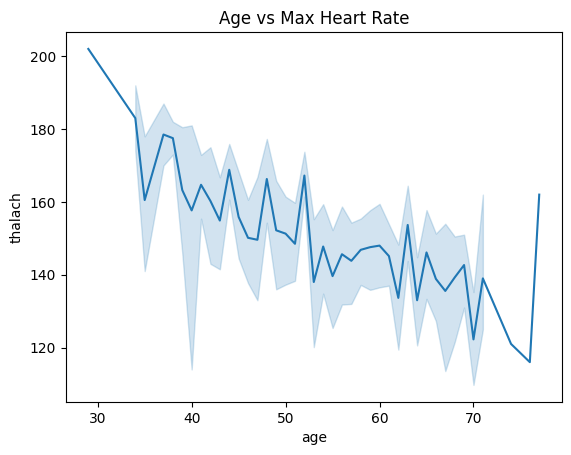

In [151]:
sns.lineplot(data=df, x='age', y='thalach')
plt.title('Age vs Max Heart Rate')
plt.show()

In [152]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


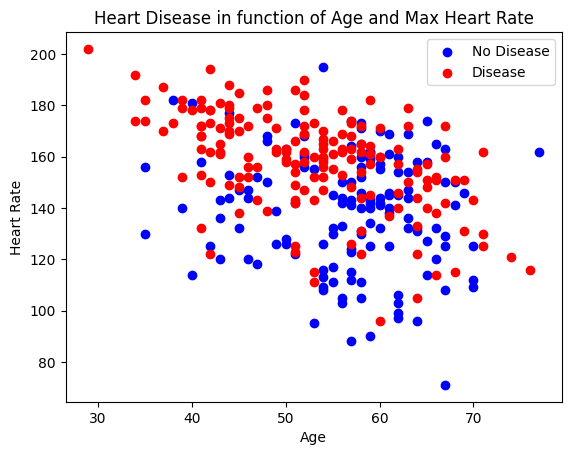

In [153]:
plt.scatter(df['age'][df['target'] == 0], df['thalach'][df['target'] == 0], c='blue', label='No Disease')
plt.scatter(df['age'][df['target'] == 1], df['thalach'][df['target'] == 1], c='red', label='Disease')
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()

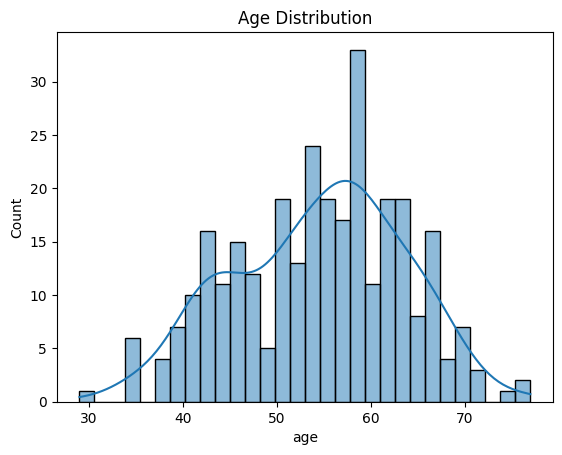

In [154]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [155]:
df['age'].median()

55.5

In [156]:
df['cp'].value_counts()

,count
cp,
0,143
2,86
1,50
3,23


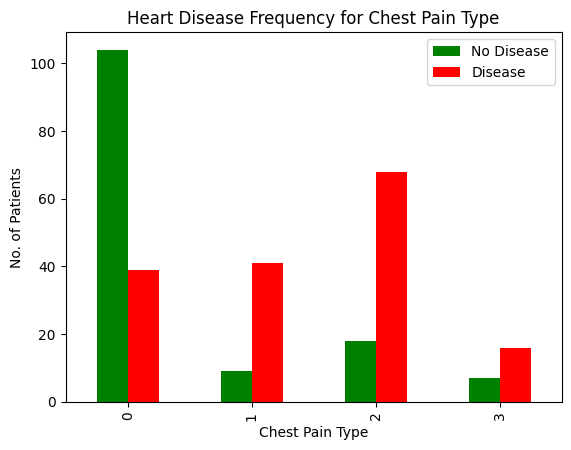

In [157]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', color=['green', 'red'])
plt.title('Heart Disease Frequency for Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('No. of Patients')
plt.legend(['No Disease', 'Disease'])
plt.show()


## Chest Pain Type
- 0: typical angina (Chest pain related to heart disease)
- 1: atypical angina (Chest pain not related to heart disease)
- 2: non-anginal pain (Typically esophageal spasms non heart related)  
- 3: asymptomatic (Chest pain not showing signs of disease)

In [158]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


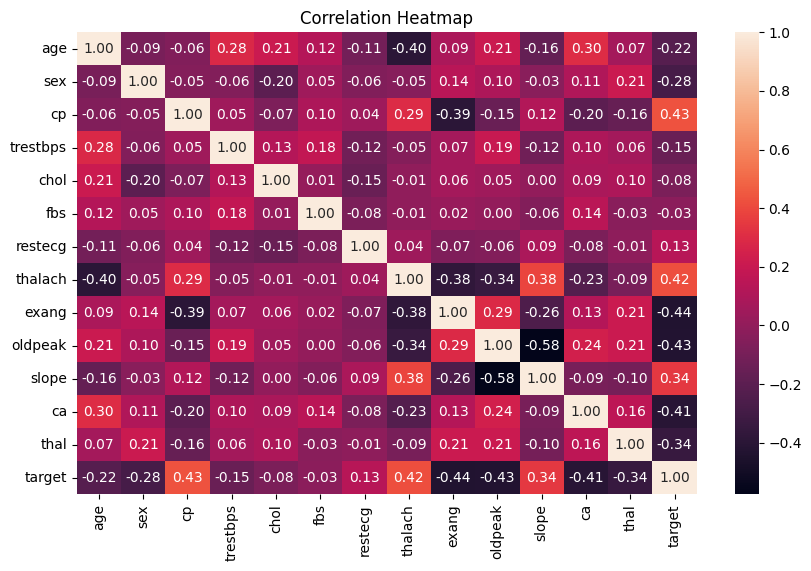

In [159]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [160]:
X = df.drop('target', axis=1)
y = df['target']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model Training and Evaluation

In [162]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [163]:
def evaluate_model(model, X_test=X_test, y_test=y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.show()

In [164]:
model_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)    
    model_scores[name] = model.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8361
Precision: 0.7879
Recall: 0.8966
F1 Score: 0.8387


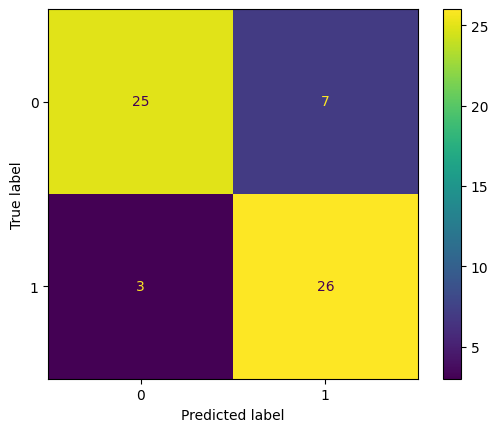

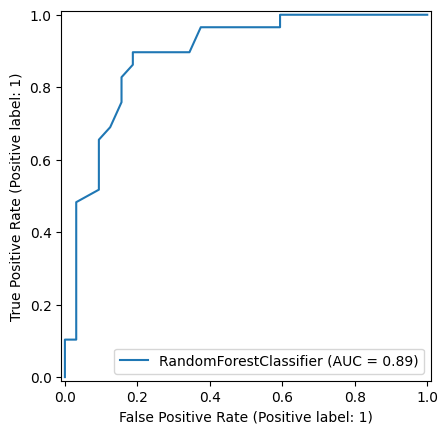

In [165]:
evaluate_model(models['Random Forest'])

Accuracy: 0.8033
Precision: 0.7297
Recall: 0.9310
F1 Score: 0.8182


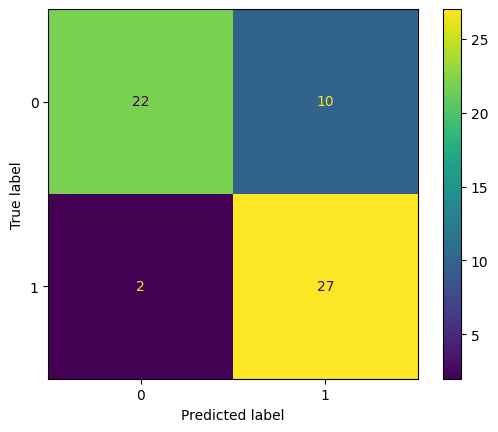

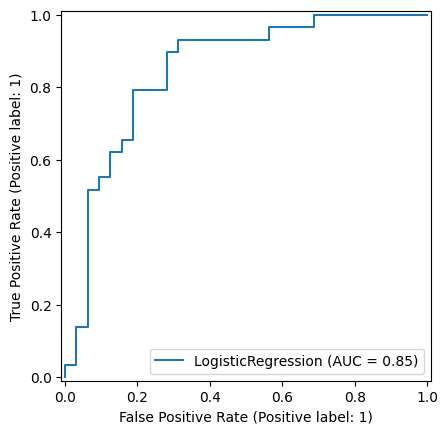

In [166]:
evaluate_model(models['Logistic Regression'])

Accuracy: 0.6393
Precision: 0.5814
Recall: 0.8621
F1 Score: 0.6944


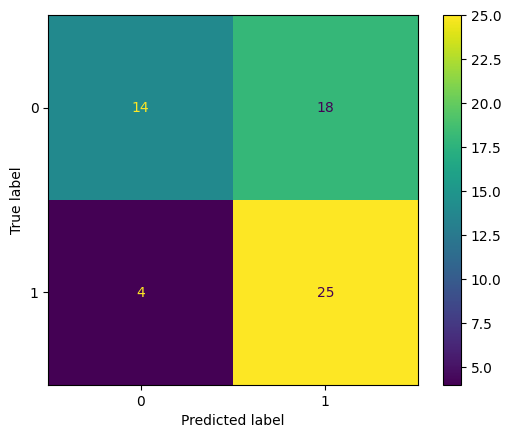

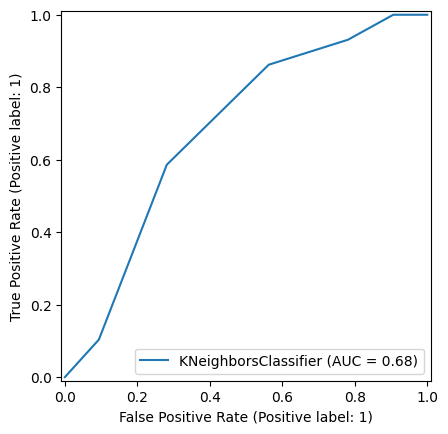

In [167]:
evaluate_model(models['K-Nearest Neighbors'])

In [168]:
for i in model_scores:
    print(f'{i}: {model_scores[i]:.4f}')

Logistic Regression: 0.8033
K-Nearest Neighbors: 0.6393
Random Forest: 0.8361


In [169]:
knn = KNeighborsClassifier()

In [170]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [171]:
knn_train_scores = []
knn_test_scores = []
for i in range(1, 100):
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_train_scores.append(knn.score(X_train, y_train))
    knn_test_scores.append(knn.score(X_test, y_test))

In [172]:
knn_scores = pd.DataFrame({
    'Train Score': knn_train_scores,
    'Test Score': knn_test_scores
}, index=range(1, 100))

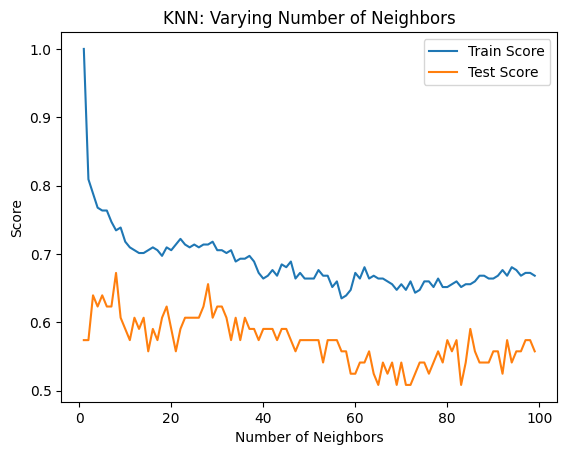

In [173]:
knn_scores['Train Score'].plot(label='Train Score')
knn_scores['Test Score'].plot(label='Test Score')
plt.title('KNN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.show()

In [174]:
knn_scores['Test Score'].idxmax()

8

In [175]:
knn_scores['Test Score'].max()

0.6721311475409836

In [176]:
log_reg = LogisticRegression()
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [177]:

# Initialize the model
log_reg = LogisticRegression(max_iter=5000)

# 1. PARAMETER GRID for GridSearchCV
# Using a list of dicts handles solver/penalty compatibility
param_grid = [
    {
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'penalty': ['l2', None],  # These solvers only support L2 or None
        'C': np.logspace(-4, 4, 10)
    },
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],  # liblinear supports L1 and L2
        'C': np.logspace(-4, 4, 10)
    },
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2', 'elasticnet', None], # saga supports all
        'C': np.logspace(-4, 4, 10),
        'l1_ratio': np.linspace(0, 1, 5) # Only needed for elasticnet
    }
]

# 2. PARAMETER DISTRIBUTIONS for RandomizedSearchCV
# Randomized search is faster for large spaces
param_dist = {
    'solver': ['saga', 'liblinear'],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 100),
    'tol': [1e-4, 1e-3, 1e-2]
}

# Implementation Examples
grid_search = GridSearchCV(log_reg, param_grid, cv=5, verbose=1, n_jobs=-1)
random_search = RandomizedSearchCV(log_reg, param_dist, n_iter=50, cv=5, verbose=1, n_jobs=-1)


In [178]:
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
Best Parameters: {'C': np.float64(0.3593813663804626), 'penalty': 'l2', 'solver': 'liblinear'}


In [179]:
random_search.fit(X_train, y_train)
print(f"Best Parameters: {random_search.best_params_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'tol': 0.001, 'solver': 'liblinear', 'penalty': 'l2', 'C': np.float64(0.7564633275546291)}


In [180]:
best_log_reg_model_random_search = random_search.best_estimator_

In [181]:
best_log_reg_model_random_search.score(X_test, y_test)

0.7868852459016393

In [182]:
best_log_reg_model_grid_search = grid_search.best_estimator_

In [183]:
best_log_reg_model_grid_search.score(X_test, y_test)

0.8032786885245902

In [184]:

rf = RandomForestClassifier(random_state=42)

# 1. PARAMETER DISTRIBUTIONS for RandomizedSearchCV (Wide Search)
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# 2. Implementation
# Search 50 random combinations to save time
random_search_rf_clf = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    n_iter=50, 
    cv=3, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

random_search_rf_clf.fit(X_train, y_train)
print(f"Best parameters: {random_search_rf_clf.best_params_}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [185]:
best_rf_clf_model_random_search = random_search_rf_clf.best_estimator_

In [186]:
best_rf_clf_model_random_search.score(X_test, y_test)

0.819672131147541

In [187]:

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Define a specific grid of parameters
# Total combinations: 3 * 3 * 2 * 2 = 36 combinations
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [None, 10, 20],            # Limit tree growth to prevent overfitting
    'min_samples_split': [2, 5],             # Min samples needed to split a node
    'max_features': ['sqrt', 'log2']         # Features considered at each split
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=5,               # 5-fold cross-validation
    scoring='accuracy', # Metric to optimize
    n_jobs=-1,          # Use all CPU cores (critical for speed in Colab)
    verbose=2           # Shows progress during the search
)

# Fit the search
grid_search.fit(X_train, y_train)

# Results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")

# Use the best model directly
best_model_rf_clf_grid_search = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 300}
Best Score: 0.8010


In [188]:
best_model_rf_clf_grid_search.score(X_test, y_test)

0.8524590163934426

In [189]:
model_scores

{'Logistic Regression': 0.8032786885245902,
 'K-Nearest Neighbors': 0.639344262295082,
 'Random Forest': 0.8360655737704918}

In [190]:
model_scores_after_tuning_randomized_search_cv = {
    'Logistic Regression': best_log_reg_model_random_search.score(X_test, y_test),
    'Random Forest Classifier': best_rf_clf_model_random_search.score(X_test, y_test)
}

In [191]:
model_scores_after_tuning_grid_search_cv = {
    'Logistic Regression': best_log_reg_model_grid_search.score(X_test, y_test),
    'Random Forest Classifier': best_model_rf_clf_grid_search.score(X_test, y_test)
}

In [192]:
model_scores_after_tuning_grid_search_cv

{'Logistic Regression': 0.8032786885245902,
 'Random Forest Classifier': 0.8524590163934426}

In [193]:
model_scores_after_tuning_randomized_search_cv

{'Logistic Regression': 0.7868852459016393,
 'Random Forest Classifier': 0.819672131147541}

In [194]:
model_scores

{'Logistic Regression': 0.8032786885245902,
 'K-Nearest Neighbors': 0.639344262295082,
 'Random Forest': 0.8360655737704918}

In [195]:
"helloWorld"

'helloWorld'

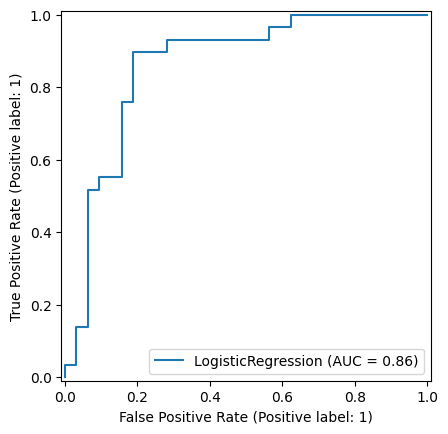

In [196]:
RocCurveDisplay.from_estimator(best_log_reg_model_grid_search, X_test, y_test)
plt.show()

In [197]:
y_pred = best_log_reg_model_grid_search.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

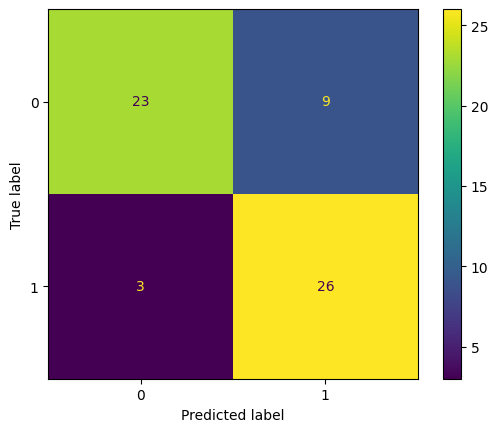

In [198]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [199]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [200]:
log_reg_model = LogisticRegression(C=0.3593813663804626, penalty='l2', solver= 'liblinear')

In [201]:
cv_accuracy = cross_val_score(log_reg_model, X, y, cv=10, scoring='accuracy')
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

np.float64(0.8410752688172043)

In [202]:
cv_precision = cross_val_score(log_reg_model, X, y, cv=10, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8212732198142415)

In [203]:
cv_recall = cross_val_score(log_reg_model, X, y, cv=10, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9099264705882353)

In [204]:
cv_f1 = cross_val_score(log_reg_model, X, y, cv=10, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8614648414648416)

In [205]:
cv_df = pd.DataFrame(
    {
        'accuracy':cv_accuracy,
        'precision':cv_precision,
        'recall':cv_recall,
        'f1':cv_f1,
    }, index=[0]
)

In [206]:
cv_df

,accuracy,precision,recall,f1
0,0.841075,0.821273,0.909926,0.861465


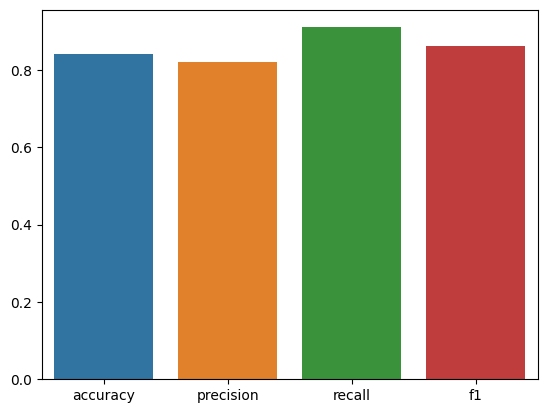

In [207]:
sns.barplot(cv_df)
plt.show()

In [208]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [209]:
log_reg_model.fit(X_train, y_train)

LogisticRegression(C=0.3593813663804626, solver='liblinear')

In [210]:
log_reg_model.coef_[0]

array([ 1.09314973e-02, -1.11473538e+00,  8.39140465e-01, -2.70648053e-02,
       -2.06821108e-04, -1.17305921e-01,  7.14246775e-01,  2.91756548e-02,
       -3.56780467e-01, -6.33683311e-01,  4.37217404e-01, -5.36546236e-01,
       -5.21380878e-01])

In [211]:
log_reg_model_coef_df = pd.DataFrame([log_reg_model.coef_[0]],columns=X.columns,index=[0])

In [212]:
log_reg_model_coef_df = log_reg_model_coef_df.T.reset_index()
log_reg_model_coef_df.columns = ['Features','Coefficients']

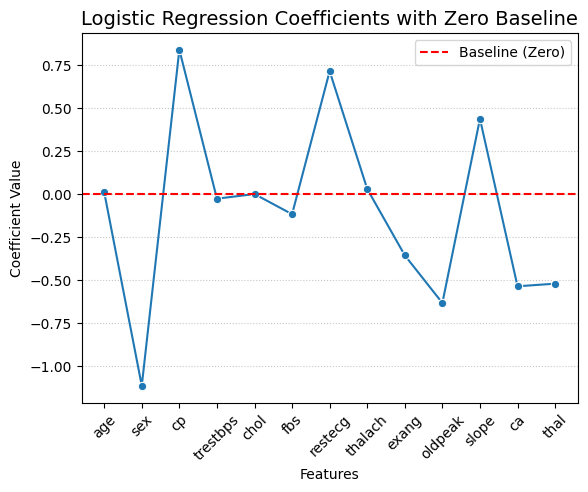

In [213]:
sns.lineplot(x=log_reg_model_coef_df['Features'],y=log_reg_model_coef_df['Coefficients'],marker='o')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5, label='Baseline (Zero)')
plt.title('Logistic Regression Coefficients with Zero Baseline', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend()

plt.show()

In [214]:
log_reg_model_coef_df

,Features,Coefficients
0,age,0.010931
1,sex,-1.114735
2,cp,0.839140
3,trestbps,-0.027065
4,chol,-0.000207
5,fbs,-0.117306
6,restecg,0.714247
7,thalach,0.029176
8,exang,-0.356780
9,oldpeak,-0.633683
